In [95]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [96]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [97]:
df.head(1156)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [98]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [99]:
df.dropna(inplace= True)

In [100]:
df.drop_duplicates(inplace=True)

In [101]:
df.shape

(768, 9)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [103]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [104]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [105]:
# X = pd.DataFrame(df, columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
# Y = df['Outcome']
# X.shape

In [106]:
def sample_rows(df, percent):
    return df.sample(int(percent*df.shape[0]), replace = True)

In [107]:
def sample_features(df, percent):
    col = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[col]
    new_df['Outcome'] = df['Outcome']
    return new_df

In [108]:
X1 = sample_rows(df, 0.02)
X1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
369,1,133,102,28,140,32.8,0.234,45,1
503,7,94,64,25,79,33.3,0.738,41,0
552,6,114,88,0,0,27.8,0.247,66,0
610,3,106,54,21,158,30.9,0.292,24,0
349,5,0,80,32,0,41.0,0.346,37,1
539,3,129,92,49,155,36.4,0.968,32,1
77,5,95,72,33,0,37.7,0.370,27,0
537,0,57,60,0,0,21.7,0.735,67,0
520,2,68,70,32,66,25.0,0.187,25,0
738,2,99,60,17,160,36.6,0.453,21,0


In [109]:
X2 = sample_rows(df, 0.02)
X2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
751,1,121,78,39,74,39.0,0.261,28,0
54,7,150,66,42,342,34.7,0.718,42,0
615,3,106,72,0,0,25.8,0.207,27,0
9,8,125,96,0,0,0.0,0.232,54,1
296,2,146,70,38,360,28.0,0.337,29,1
618,9,112,82,24,0,28.2,1.282,50,1
552,6,114,88,0,0,27.8,0.247,66,0
565,2,95,54,14,88,26.1,0.748,22,0
187,1,128,98,41,58,32.0,1.321,33,1
343,5,122,86,0,0,34.7,0.290,33,0


In [110]:
X3= sample_rows(df, 0.02)
X3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
355,9,165,88,0,0,30.4,0.302,49,1
109,0,95,85,25,36,37.4,0.247,24,1
447,0,95,80,45,92,36.5,0.330,26,0
71,5,139,64,35,140,28.6,0.411,26,0
354,3,90,78,0,0,42.7,0.559,21,0
91,4,123,80,15,176,32.0,0.443,34,0
206,8,196,76,29,280,37.5,0.605,57,1
389,3,100,68,23,81,31.6,0.949,28,0
254,12,92,62,7,258,27.6,0.926,44,1
573,2,98,60,17,120,34.7,0.198,22,0


In [111]:
X3.shape

(15, 9)

In [112]:
dtc1 = DecisionTreeClassifier()
dtc1.fit(X1.iloc[:, 0:8], X1.iloc[:,-1])
y_pred1= dtc1.predict(np.array([[8, 125, 96, 0, 0, 0.0, 0.232, 54]]))
y_pred1

c:\Users\AL-HAMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

[Text(0.6, 0.8333333333333334, 'x[2] <= 90.0\ngini = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(0.4, 0.5, 'x[5] <= 39.95\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

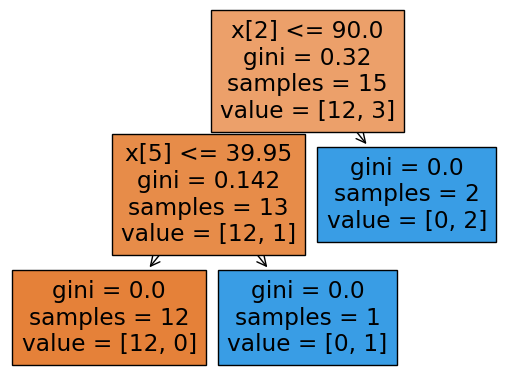

In [113]:
from sklearn import tree
tree.plot_tree(dtc1, filled = True)

In [114]:
dtc2 = DecisionTreeClassifier()
dtc2.fit(X2.iloc[:, :8], X2.iloc[:,-1])
y_pred2= dtc1.predict(np.array([[1, 87, 68, 34, 77, 37.6, 0.401, 24]]))
y_pred2

c:\Users\AL-HAMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

[Text(0.4444444444444444, 0.875, 'x[1] <= 124.0\ngini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(0.2222222222222222, 0.625, 'x[6] <= 1.093\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.625, 'x[1] <= 141.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.7777777777777778, 0.375, 'x[5] <= 29.05\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

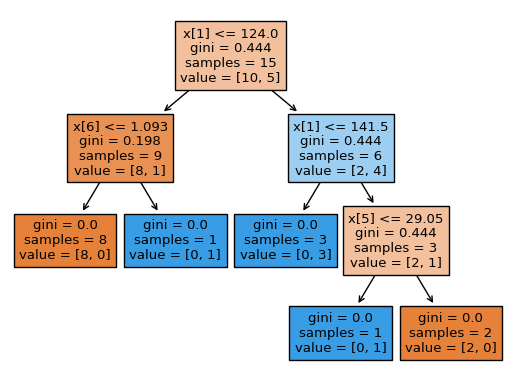

In [115]:
tree.plot_tree(dtc2, filled = True)

In [116]:
dtc3 = DecisionTreeClassifier()
dtc3.fit(X3.iloc[:, :8], X3.iloc[:,-1])
y_pred3= dtc1.predict(np.array([[13, 158, 114, 0, 0, 42.3, 0.257, 44]]))
y_pred3

c:\Users\AL-HAMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

[Text(0.7142857142857143, 0.9, 'x[7] <= 42.5\ngini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(0.5714285714285714, 0.7, 'x[4] <= 58.5\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.42857142857142855, 0.5, 'x[1] <= 115.0\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2857142857142857, 0.3, 'x[1] <= 92.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.14285714285714285, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.42857142857142855, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5714285714285714, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7142857142857143, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.8571428571428571, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

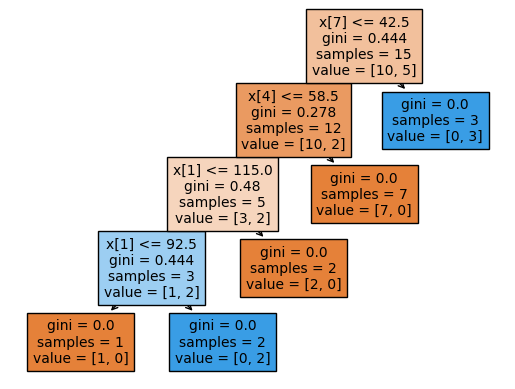

In [117]:
tree.plot_tree(dtc3, filled = True)

# Combine sampling of rows sampling and feature sampling

In [118]:
def combine_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return  sample_features(new_df, col_percent)

In [119]:
df1 = combine_sampling(df, 0.2, 0.3)
df1

C:\Users\AL-HAMD\AppData\Local\Temp\ipykernel_12092\802831665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Outcome'] = df['Outcome']


,Glucose,BMI,Outcome
226,101,35.7,0
368,81,27.5,0
628,128,34.6,0
29,117,34.1,0
495,166,26.6,0
...,...,...,...
534,77,33.3,0
367,101,21.0,0
0,148,33.6,1
653,120,26.8,0


In [120]:
df2 = combine_sampling(df, 0.2, 0.3)
df2

C:\Users\AL-HAMD\AppData\Local\Temp\ipykernel_12092\802831665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Outcome'] = df['Outcome']


,DiabetesPedigreeFunction,SkinThickness,Outcome
228,2.329,39,0
397,0.196,40,1
607,0.482,25,0
129,0.741,0,1
48,0.344,32,1
...,...,...,...
731,0.259,0,1
516,0.771,34,1
718,0.415,46,0
735,0.284,32,0


In [121]:
df3 = combine_sampling(df, 0.2, 0.3)
df3

C:\Users\AL-HAMD\AppData\Local\Temp\ipykernel_12092\802831665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Outcome'] = df['Outcome']


,Glucose,BMI,Outcome
179,130,39.1,1
315,112,34.1,0
123,132,26.8,0
146,57,32.8,0
163,100,29.7,0
...,...,...,...
20,126,39.3,0
36,138,33.2,0
709,93,38.0,1
358,88,35.3,0


In [122]:
print('shape of df1 combine sampling', df1.shape)
print('shape of df2 combine sampling', df2.shape)
print('shape of df3 combine sampling', df3.shape)

shape of df1 combine sampling (153, 3)
shape of df2 combine sampling (153, 3)
shape of df3 combine sampling (153, 3)


In [123]:
dtc1 = DecisionTreeClassifier()
dtc1.fit(df1.iloc[:, 0:2], df1.iloc[:,-1])
y_pred = dtc1.predict(np.array([[158, 114]]))
y_pred

c:\Users\AL-HAMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

[Text(0.3349358974358974, 0.9642857142857143, 'x[0] <= 131.0\ngini = 0.453\nsamples = 153\nvalue = [100, 53]'),
 Text(0.05128205128205128, 0.8928571428571429, 'x[0] <= 99.5\ngini = 0.268\nsamples = 88\nvalue = [74, 14]'),
 Text(0.02564102564102564, 0.8214285714285714, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(0.07692307692307693, 0.8214285714285714, 'x[1] <= 27.4\ngini = 0.398\nsamples = 51\nvalue = [37.0, 14.0]'),
 Text(0.05128205128205128, 0.75, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.10256410256410256, 0.75, 'x[0] <= 100.5\ngini = 0.489\nsamples = 33\nvalue = [19, 14]'),
 Text(0.07692307692307693, 0.6785714285714286, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1282051282051282, 0.6785714285714286, 'x[0] <= 106.5\ngini = 0.475\nsamples = 31\nvalue = [19, 12]'),
 Text(0.05128205128205128, 0.6071428571428571, 'x[1] <= 39.45\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.02564102564102564, 0.5357142857142857, 'gini = 0.0\nsamples = 5\nvalue = [5, 0

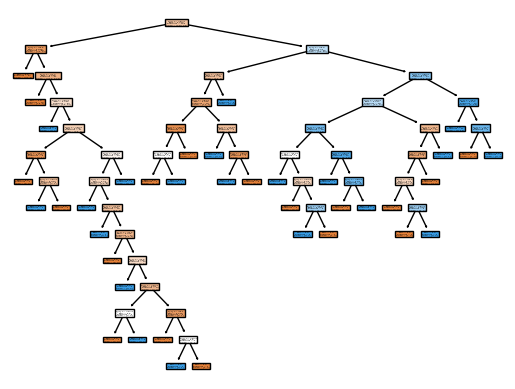

In [124]:
tree.plot_tree(dtc1, filled= True)

In [125]:
dtc2 = DecisionTreeClassifier()
dtc2.fit(df1.iloc[:, 0:2], df1.iloc[:,-1])
y_pred = dtc2.predict(np.array([[56,90]]))
y_pred

c:\Users\AL-HAMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

[Text(0.3349358974358974, 0.9642857142857143, 'x[0] <= 131.0\ngini = 0.453\nsamples = 153\nvalue = [100, 53]'),
 Text(0.05128205128205128, 0.8928571428571429, 'x[0] <= 99.5\ngini = 0.268\nsamples = 88\nvalue = [74, 14]'),
 Text(0.02564102564102564, 0.8214285714285714, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(0.07692307692307693, 0.8214285714285714, 'x[1] <= 27.4\ngini = 0.398\nsamples = 51\nvalue = [37.0, 14.0]'),
 Text(0.05128205128205128, 0.75, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.10256410256410256, 0.75, 'x[0] <= 100.5\ngini = 0.489\nsamples = 33\nvalue = [19, 14]'),
 Text(0.07692307692307693, 0.6785714285714286, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1282051282051282, 0.6785714285714286, 'x[0] <= 106.5\ngini = 0.475\nsamples = 31\nvalue = [19, 12]'),
 Text(0.05128205128205128, 0.6071428571428571, 'x[1] <= 39.45\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.02564102564102564, 0.5357142857142857, 'gini = 0.0\nsamples = 5\nvalue = [5, 0

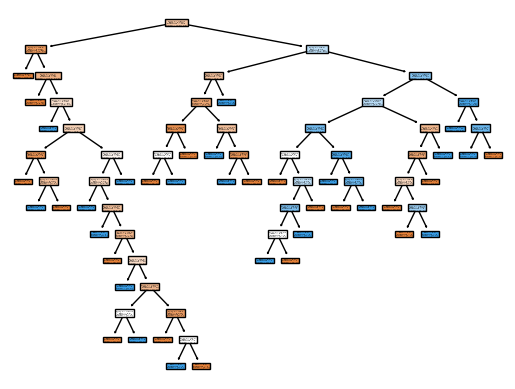

In [126]:
tree.plot_tree(dtc2, filled= True)

In [127]:
dtc3 = DecisionTreeClassifier()
dtc3.fit(df1.iloc[:, 0:2], df1.iloc[:,-1])
y_pred = dtc3.predict(np.array([[125, 0]]))
y_pred

c:\Users\AL-HAMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

[Text(0.3349358974358974, 0.9642857142857143, 'x[0] <= 131.0\ngini = 0.453\nsamples = 153\nvalue = [100, 53]'),
 Text(0.05128205128205128, 0.8928571428571429, 'x[0] <= 99.5\ngini = 0.268\nsamples = 88\nvalue = [74, 14]'),
 Text(0.02564102564102564, 0.8214285714285714, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(0.07692307692307693, 0.8214285714285714, 'x[1] <= 27.4\ngini = 0.398\nsamples = 51\nvalue = [37.0, 14.0]'),
 Text(0.05128205128205128, 0.75, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.10256410256410256, 0.75, 'x[0] <= 100.5\ngini = 0.489\nsamples = 33\nvalue = [19, 14]'),
 Text(0.07692307692307693, 0.6785714285714286, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1282051282051282, 0.6785714285714286, 'x[0] <= 106.5\ngini = 0.475\nsamples = 31\nvalue = [19, 12]'),
 Text(0.05128205128205128, 0.6071428571428571, 'x[1] <= 39.45\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.02564102564102564, 0.5357142857142857, 'gini = 0.0\nsamples = 5\nvalue = [5, 0

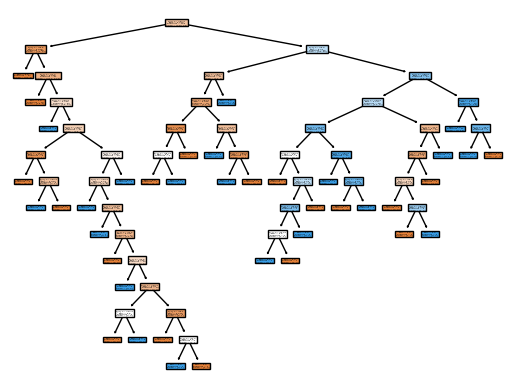

In [128]:
tree.plot_tree(dtc3, filled= True)